In [84]:
# https://heartbeat.comet.ml/using-a-keras-long-shortterm-memory-lstm-model-to-predict-stock-prices-a08c9f69aa74
# https://colab.research.google.com/drive/1JWoPYyrIEkf_R34lKbvLyVSvfFN_jcY5?usp=sharing#scrollTo=vtq5tneLUFW3

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import  MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [35]:
fname = 'data/NSE-TATAGLOBAL.csv'
ftest = 'data/tatatest.csv'

In [50]:
df = pd.read_csv(fname)
df_test = pd.read_csv(ftest)
training_df = df.iloc[:, 1:2].values

In [51]:
training_df

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [52]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [53]:
df_tr = scaler.fit_transform(training_df)

In [54]:
X_train, y_train = list(), list()
for i in range(60, 2035):
    X_train.append(df_tr[i-60:i, 0])
    y_train.append(df_tr[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [55]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [56]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [57]:
X_train.shape

(1975, 60, 1)

In [61]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [62]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_48 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_37 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_49 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_38 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_50 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_39 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_51 (LSTM)              (None, 50)              

In [66]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

2022-05-31 17:12:31.775178: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100
62/62 [==============================] - 5s 42ms/step - loss: 0.0080
Epoch 2/100
62/62 [==============================] - 3s 45ms/step - loss: 0.0031
Epoch 3/100
62/62 [==============================] - 3s 49ms/step - loss: 0.0033
Epoch 4/100
62/62 [==============================] - 3s 49ms/step - loss: 0.0028
Epoch 5/100
62/62 [==============================] - 3s 48ms/step - loss: 0.0024
Epoch 6/100
62/62 [==============================] - 3s 49ms/step - loss: 0.0021
Epoch 7/100
62/62 [==============================] - 3s 49ms/step - loss: 0.0021
Epoch 8/100
62/62 [==============================] - 3s 49ms/step - loss: 0.0021
Epoch 9/100
62/62 [==============================] - 3s 48ms/step - loss: 0.0017
Epoch 10/100
62/62 [==============================] - 3s 49ms/step - loss: 0.0018
Epoch 11/100
62/62 [==============================] - 3s 48ms/step - loss: 0.0018
Epoch 12/100
62/62 [==============================] - 3s 51ms/step - loss: 0.0016
Epoch 13/100
62/62 [=====

In [68]:
real_stock_price = df_test.iloc[:, 1:2].values

In [69]:
real_stock_price

array([[220.1 ],
       [221.1 ],
       [229.45],
       [230.3 ],
       [237.7 ],
       [237.1 ],
       [229.7 ],
       [226.25],
       [215.  ],
       [215.  ],
       [215.5 ],
       [208.  ],
       [217.  ],
       [223.5 ],
       [230.  ],
       [234.55]])

In [71]:
dataset_total = pd.concat((df['Open'], df_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

In [73]:
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [74]:
predicted_stock_price = model.predict(X_test)

In [76]:
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

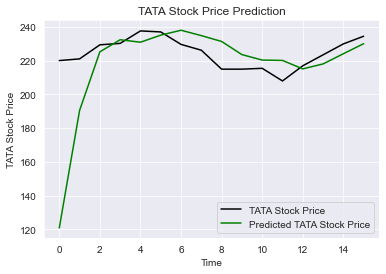

In [77]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

(210.0, 240.0)

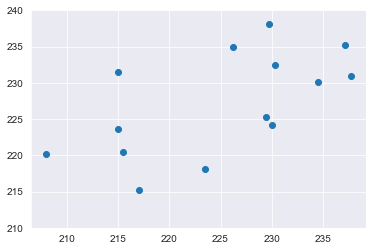

In [82]:
plt.scatter(x=real_stock_price, y=predicted_stock_price)
plt.ylim(210, 240)

In [67]:
import visualkeras
visualkeras.layered_view(model=model, legend=True)

TypeError: 'int' object is not iterable